In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
from scipy import sparse
import pickle
import matplotlib.pyplot as plt

In [9]:
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import seaborn as sns
%matplotlib inline
p = sns.color_palette()
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

In [10]:
features_dir227 = './features_227/'
features_dir306 = './features_306/'
data_dir = "./data/FT_Camp_2/"
inter_dir = "./inter_data/2/"

In [11]:
# 训练数据
train227 = pd.read_csv(data_dir + 'train.csv')

# 预测目标用户
pred_users306 = pd.read_csv(data_dir + 'pred_users.csv')

In [12]:
# 导入数据
features227 = train227[['id']]

用户基础属性227 = pd.read_csv(features_dir227 + "用户基础属性.csv")
features227 = pd.merge(features227, 用户基础属性227, on='id', how='left')

收入总和227 = pd.read_csv(features_dir227 + "收入总和.csv")
features227 = pd.merge(features227, 收入总和227, on='id', how='left')

支出总和227 = pd.read_csv(features_dir227 + "支出总和.csv")
features227 = pd.merge(features227, 支出总和227, on='id', how='left')

收支总和227 = pd.read_csv(features_dir227 + "收支总和.csv")
features227 = pd.merge(features227, 收支总和227, on='id', how='left')

收支记录次数227 = pd.read_csv(features_dir227 + "收支记录次数.csv")
features227 = pd.merge(features227, 收支记录次数227, on='id', how='left')

收入最大值227 = pd.read_csv(features_dir227 + "收入最大值.csv")
features227 = pd.merge(features227, 收入最大值227, on='id', how='left')

支出最大值227 = pd.read_csv(features_dir227 + "支出最大值.csv")
features227 = pd.merge(features227, 支出最大值227, on='id', how='left')

# 各类别收支记录次数227 = pd.read_csv(features_dir227 + "各类别收支记录次数.csv")
# features227 = pd.merge(features227, 各类别收支记录次数227, on='id', how='left')

# 各类别收支金额227 = pd.read_csv(features_dir227 + "各类别收支金额.csv")
# features227 = pd.merge(features227, 各类别收支金额227, on='id', how='left')

# 各原始类别收支记录次数227 = pd.read_csv(features_dir227 + "各原始类别收支记录次数.csv")
# features227 = pd.merge(features227, 各原始类别收支记录次数227, on='id', how='left')

# 各原始类别收支金额227 = pd.read_csv(features_dir227 + "各原始类别收支金额.csv")
# features227 = pd.merge(features227, 各原始类别收支金额227, on='id', how='left')

# 细粒度收支总和_10227 = pd.read_csv(features_dir227 + "细粒度收支总和_10.csv")
# features227 = pd.merge(features227, 细粒度收支总和_10227, on='id', how='left')

# 对应时间收支总和227 = pd.read_csv(features_dir227 + "对应时间收支总和.csv")
# features227 = pd.merge(features227, 对应时间收支总和227, on='id', how='left')

# 对应时间支出总和227 = pd.read_csv(features_dir227 + "对应时间支出总和.csv")
# features227 = pd.merge(features227, 对应时间支出总和227, on='id', how='left')

# 对应时间收入总和227 = pd.read_csv(features_dir227 + "对应时间收入总和.csv")
# features227 = pd.merge(features227, 对应时间收入总和227, on='id', how='left')

# 收入均值227 = pd.read_csv(features_dir227 + "收入均值.csv")
# features227 = pd.merge(features227, 收入均值227, on='id', how='left')

# 支出均值227 = pd.read_csv(features_dir227 + "支出均值.csv")
# features227 = pd.merge(features227, 支出均值227, on='id', how='left')

# 收支均值227 = pd.read_csv(features_dir227 + "收支均值.csv")
# features227 = pd.merge(features227, 收支均值227, on='id', how='left')

features227.head()

,id,gender,age,aum227,收入总和,支出总和,收支总和,收支记录次数,收入最大值,支出最大值
0,1,0,52.0,219481.95,120873.00,-72587.00,48286.00,13.0,56388.00,-50000.0
1,2,0,32.0,236183.79,348701.71,-340247.40,8454.31,31.0,96000.00,-316000.0
2,3,0,22.0,0.06,6920.67,-12561.21,-5640.54,167.0,6841.06,-3000.0
3,4,1,21.0,420.26,2110.00,-2093.93,16.07,50.0,520.00,-520.0
4,6,1,34.0,231.42,829116.97,-829294.89,-177.92,81.0,300000.00,-300000.0


In [13]:
XY227 = pd.merge(features227, train227, on='id', how='left')
XY227.head()

,id,gender,age,aum227,收入总和,支出总和,收支总和,收支记录次数,收入最大值,支出最大值,click_w228
0,1,0,52.0,219481.95,120873.00,-72587.00,48286.00,13.0,56388.00,-50000.0,0
1,2,0,32.0,236183.79,348701.71,-340247.40,8454.31,31.0,96000.00,-316000.0,0
2,3,0,22.0,0.06,6920.67,-12561.21,-5640.54,167.0,6841.06,-3000.0,0
3,4,1,21.0,420.26,2110.00,-2093.93,16.07,50.0,520.00,-520.0,0
4,6,1,34.0,231.42,829116.97,-829294.89,-177.92,81.0,300000.00,-300000.0,0


In [8]:
非点击年龄 = XY227.loc[XY227['click_w228']==0,'age']
点击年龄 = XY227.loc[XY227['click_w228']==1,'age']

/opt/conda/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


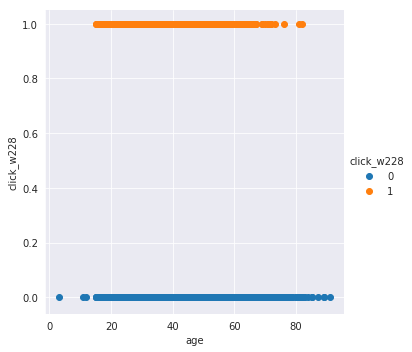

In [9]:
sns.FacetGrid(XY227, hue="click_w228", height=5).map(plt.scatter, "age", "click_w228").add_legend()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


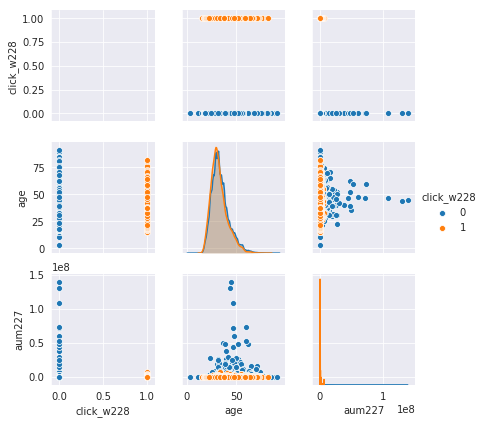

In [26]:
xxx=XY227[['click_w228','age','aum227']]
sns.pairplot(xxx, hue="click_w228", height=2)

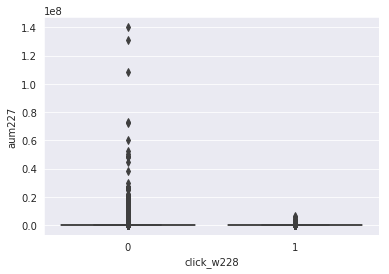

In [34]:
ax = sns.boxplot(x="click_w228", y="aum227", data=XY227, whis=1)

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


/opt/conda/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


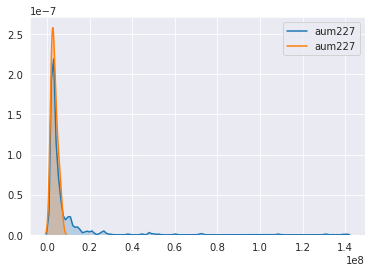

In [9]:
amin = 2000000
amax = 1.4e8

# amin = 0
# amax = 6000000

# 非点击余额 = XY227.loc[(XY227['click_w228']==0) & (XY227['aum227']>=amin) & (XY227['aum227']<=amax), 'aum227']
# 点击余额 = XY227.loc[(XY227['click_w228']==1) & (XY227['aum227']>=amin) & (XY227['aum227']<=amax), 'aum227']
非点击余额 = XY227.loc[XY227['click_w228']==0, 'aum227']
点击余额 = XY227.loc[XY227['click_w228']==1, 'aum227']
sns.kdeplot(非点击余额,clip = (amin, amax), shade=True)
sns.kdeplot(点击余额, clip = (amin, amax), shade=True)


In [10]:
print(非点击余额.min(), 非点击余额.max())
print(点击余额.min(), 点击余额.max())

-9999.0 139982829.3
-9999.0 6501733.28


In [11]:
print(len(非点击余额[非点击余额<0]))
print(len(非点击余额[非点击余额==-9999]))
print(len(非点击余额[非点击余额==0]))

534
534
3330


In [12]:
print(len(点击余额[点击余额<0]))
print(len(点击余额[点击余额==-9999]))
print(len(点击余额[点击余额==0]))

107
107
582


In [93]:
a = 非点击余额.shape[0]
b = 点击余额.shape[0]

In [94]:
print(a,b,a/(a+b),b/(a+b))

96252 12000 0.8891475446181133 0.1108524553818867


## 提取的特征分析

In [122]:
# fsname='特征选择001_类别金额组合'
# for i in range(5):
#     feature_scores = pd.read_csv(inter_dir + 'feature_scores_'+fsname+str(i)+'.csv')
#     def clean(s):
#         if s[0]=='各':
#             return '各类别收支金额' + s[9:]
#         else:
#     #     print(type(s))
#             return s
#     feature_scores['feature'] = feature_scores['feature'].fillna('nan')
#     feature_scores['feature'] = feature_scores['feature'].apply(clean)
#     feature_scores.to_csv(inter_dir + 'feature_scores_'+fsname+str(i)+'.csv', index=False)
#     print(feature_scores.head())

In [129]:
# fsname='特征选择001_原始类别金额组合'
# for i in range(5):
#     feature_scores = pd.read_csv(inter_dir + 'feature_scores_'+fsname+str(i)+'.csv')
#     def clean(s):
#         if s[0]=='各':
#             return '各原始类别收支金额' + s[11:]
#         else:
#     #     print(type(s))
#             return s
#     feature_scores['feature'] = feature_scores['feature'].fillna('nan')
#     feature_scores['feature'] = feature_scores['feature'].apply(clean)
#     feature_scores.to_csv(inter_dir + 'feature_scores_'+fsname+str(i)+'.csv', index=False)
#     print(feature_scores.head())

In [14]:
def parse_f(fsname='特征选择001_'):
    sfeatures = set()
    for i in range(5):
        feature_scores = pd.read_csv(inter_dir + 'feature_scores_'+fsname+str(i)+'.csv')
        sfeatures |= set(feature_scores.loc[feature_scores['score']>0, 'feature'])
    sfeatures = list(sfeatures)
    # 类别映射表
    trx_cod = pd.read_csv(data_dir + 'trx_cod.csv')
    # G2交易代码映射表
    g2 = pd.read_csv(data_dir + 'g2.csv')
    trx_cod['sz_id_s'] = trx_cod['sz_id'].astype(str)
    
    fdf = pd.DataFrame(sfeatures, columns=['feature'])
    def clean(s):
        if s[-2]=='_':
            return s[:-2]
        else:
            return s
    fdf['f_id'] = fdf['feature'].apply(clean)
    fdf = pd.merge(fdf, trx_cod, how='left', left_on='f_id', right_on='sz_id_s')
    fdf = pd.merge(fdf, g2, how='left', left_on='f_id', right_on='g2_id')
    fdf = fdf.loc[:,['feature','cat1','cat2','g2_nam','g2_dnam']]
    fdf['rank'] = fdf.index + 1
    fdf.to_csv(inter_dir + 'features_eda_'+fsname+'.csv', index=False)
    print(fdf.head())

# parse_f(fsname='特征选择001_')

In [15]:
# parse_f(fsname='特征选择001_类别次数组合')
# parse_f(fsname='特征选择001_类别金额组合')
# parse_f(fsname='特征选择001_原始类别次数组合')
parse_f(fsname='特征选择001_原始类别金额组合')

              feature cat1 cat2 g2_nam g2_dnam  rank
0  各原始类别收支金额CDT2+AKOT  NaN  NaN    NaN     NaN     1
1  各原始类别收支金额ONNK+ONBX  NaN  NaN    NaN     NaN     2
2  各原始类别收支金额ONWT+AKOT  NaN  NaN    NaN     NaN     3
3  各原始类别收支金额AGBN+ONNK  NaN  NaN    NaN     NaN     4
4  各原始类别收支金额RYTB+AKOT  NaN  NaN    NaN     NaN     5


In [16]:
def get_zuhe(fsname='特征选择001_类别次数组合'):
    fdf = pd.read_csv(inter_dir + 'features_eda_'+fsname+'.csv')
    def _filter(s):
        if s[0]=='各':
            return True
        else:
            return False
    tmp_rst = fdf[fdf['feature'].apply(_filter)]
    tmp_rst.to_csv(inter_dir + '选择的_'+fsname+'.csv', index=False)
    print(tmp_rst.head())


In [17]:
# get_zuhe(fsname='特征选择001_类别次数组合')
# get_zuhe(fsname='特征选择001_类别金额组合')
# get_zuhe(fsname='特征选择001_原始类别次数组合')
get_zuhe(fsname='特征选择001_原始类别金额组合')

              feature  cat1  cat2 g2_nam g2_dnam  rank
0  各原始类别收支金额CDT2+AKOT   NaN   NaN    NaN     NaN     1
1  各原始类别收支金额ONNK+ONBX   NaN   NaN    NaN     NaN     2
2  各原始类别收支金额ONWT+AKOT   NaN   NaN    NaN     NaN     3
3  各原始类别收支金额AGBN+ONNK   NaN   NaN    NaN     NaN     4
4  各原始类别收支金额RYTB+AKOT   NaN   NaN    NaN     NaN     5


In [ ]:
选择的各类别收支记录次数组合特征 = fdf[fdf['feature']]
选择的各类别收支记录次数组合特征.to_csv(inter_dir + "选择的各类别收支记录次数组合特征.csv", index=False)
选择的各类别收支记录次数组合特征.head()

In [53]:
选择的类别特征 = fdf[fdf['cat1'].notna()|fdf['cat2'].notna()]
选择的类别特征.to_csv(inter_dir + "选择的类别特征.csv", index=False)
选择的类别特征.head()

,feature,cat1,cat2,g2_nam,g2_dnam,rank
3,212_x,收入,红包,NaN,NaN,4
8,209_y,收入,退款,NaN,NaN,9
10,305_y,本人资金往来,贵金属,NaN,NaN,11
13,302_y,本人资金往来,理财产品,NaN,NaN,14
16,208_x,收入,他人转入,NaN,NaN,17


In [52]:
选择的原始类别特征 = fdf[fdf['g2_nam'].notna() | fdf['g2_dnam'].notna()]
选择的原始类别特征.to_csv(inter_dir + "选择的原始类别特征.csv", index=False)
选择的原始类别特征.head()

,feature,cat1,cat2,g2_nam,g2_dnam,rank
0,ICRR_y,NaN,NaN,对私提回贷,RI网银贷记接收收款,1
1,KPC1_x,NaN,NaN,商户清算,收单类业务商户清算,2
2,SJYK_y,NaN,NaN,E招贷,E招贷,3
4,FD98_y,NaN,NaN,基金快赎,基金快速赎回,5
5,YKJJ_x,NaN,NaN,本行买基金,购买基金一卡通资金代扣,6


In [58]:
选择的基本特征 = fdf[fdf['cat1'].isna() & fdf['g2_nam'].isna()]
选择的基本特征.to_csv(inter_dir + "选择的基本特征.csv", index=False)
选择的基本特征.head()

,feature,cat1,cat2,g2_nam,g2_dnam,rank
6,收入均值,NaN,NaN,NaN,NaN,7
15,支出总和,NaN,NaN,NaN,NaN,16
19,age,NaN,NaN,NaN,NaN,20
99,收支均值,NaN,NaN,NaN,NaN,100
107,支出最大值,NaN,NaN,NaN,NaN,108


In [61]:
# 特征分数 = pd.read_csv(inter_dir + 'feature_scores007_'+'1'+'.csv')['feature']
for i in range(5):
    feature_scores = pd.read_csv(inter_dir + 'feature_scores007_'+str(i)+'.csv')
    break
#     sfeatures |= set(feature_scores.loc[feature_scores['score']>0, 'feature'])

In [76]:
# for i in range(0,320,10):
#     print(i,feature_scores.loc[:i,'score'].sum())